In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
import matplotlib as mpl

warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [3]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D')
fig_dir = os.path.join(output_dir, 'figures')
lr = 0.0005
max_epoch = 30000
roi_list = ['V1','V2','V3']
vsc='pRFsize'
nsd_subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
ARGS_2D = ['sub','lr','eph','roi']
roi_pal = [sns.color_palette('dark', 10)[:][k] for k in  [3,2,0]]
roi_pal.insert(0, (0.3,0.3,0.3))
stim_classes=['annulus', 'pinwheel', 'forward spiral','reverse spiral']

## Load bootstraps and the actual model 

In [4]:
pt_file_list = []
for subj, roi in itertools.product(nsd_subj_list, roi_list):
    file_name = os.path.join(output_dir, 'sfp_model', 'results_2D', 'nsdsyn', 'corrected',
                             f'model-params_lr-{lr}_eph-{max_epoch}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(file_name)
nsd_params = model.load_all_models(pt_file_list, *ARGS_2D)

nsd_precision_s =  pd.read_csv(os.path.join(output_dir, 'dataframes', 'nsdsyn', 'precision','corrected', f'precision-s_dset-nsdsyn_vs-pRFsize.csv'))
nsd_df = pd.merge(nsd_params, nsd_precision_s[['sub','vroinames','precision']], on=['sub','vroinames'])

In [5]:
nsd_df

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,lr_rate,max_epoch,vroinames,precision
0,2.536201,0.139149,0.271883,-0.072822,0.003162,-0.255981,0.014144,0.080796,-0.015730,subj01,0.0005,30000,V1,0.608591
1,5.673376,0.206010,0.329357,0.005833,0.011239,-1.333614,0.415459,0.067381,-0.011958,subj01,0.0005,30000,V2,0.627646
2,5.087923,0.229920,0.282382,-0.024401,-0.013462,-1.255991,0.368672,0.092489,-0.003930,subj01,0.0005,30000,V3,1.009925
3,1.938979,0.148039,0.082835,0.147832,-0.039300,-0.038702,-0.000303,0.030481,-0.002720,subj02,0.0005,30000,V1,0.416201
4,3.940679,0.409761,-0.087941,0.266961,-0.271394,-0.262659,0.112699,0.065017,-0.077518,subj02,0.0005,30000,V2,0.421088
5,4.336098,0.274681,-0.040346,0.316437,-0.076737,-0.479528,0.175140,0.014057,-0.017730,subj02,0.0005,30000,V3,0.618126
6,2.352920,0.056186,0.105715,0.152566,-0.006781,0.065288,-0.066534,0.006534,-0.023752,subj03,0.0005,30000,V1,0.212653
7,3.327345,0.102481,0.032888,0.133718,-0.116262,-0.157560,-0.025522,0.014571,-0.001961,subj03,0.0005,30000,V2,0.356008
8,4.078011,0.075930,0.025089,-0.049375,0.016704,-0.361381,0.062256,0.022955,0.008556,subj03,0.0005,30000,V3,0.713608
9,1.942852,0.206604,0.119989,0.133012,-0.023695,0.069233,-0.062159,0.076657,-0.018837,subj04,0.0005,30000,V1,0.610271


In [11]:
pt_file_list = []
for bts, subj, roi in itertools.product(range(0,100), nsd_subj_list[0:1], roi_list[0:1]):
    file_name = os.path.join(output_dir, 'sfp_model', 'results_2D', 'nsdsyn',  'bootstraps', 
                             f'bootstrap-{bts}_model-params_lr-{lr}_eph-{max_epoch}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(file_name)
nsd_bts_params = model.load_all_models(pt_file_list, *ARGS_2D+['bootstrap'])

nsd_bts_df = pd.merge(nsd_bts_params, nsd_precision_s[['sub','vroinames','precision']], on=['sub','vroinames'])

In [12]:
nsd_bts_df

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,sub,lr_rate,max_epoch,vroinames,bootstrap,precision
0,2.487393,0.149460,0.302293,-0.027358,0.014342,-0.456676,0.077686,0.058779,-0.004235,subj01,0.0005,30000,V1,0,0.608591
1,2.831192,0.113386,0.307559,-0.043163,-0.021541,-0.383293,0.136445,0.052213,0.012605,subj01,0.0005,30000,V1,1,0.608591
2,2.488723,0.173628,0.192633,-0.008881,-0.017595,-0.202399,0.026561,0.059924,-0.000824,subj01,0.0005,30000,V1,2,0.608591
3,2.558660,0.127557,0.251542,-0.055614,-0.032146,-0.176586,-0.025182,0.046962,-0.001889,subj01,0.0005,30000,V1,3,0.608591
4,2.142833,0.164705,0.167192,-0.072185,-0.012788,-0.119611,-0.033862,0.062175,-0.002510,subj01,0.0005,30000,V1,4,0.608591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.536486,0.144807,0.274699,-0.004827,-0.037580,-0.332800,-0.092255,0.043515,0.005835,subj01,0.0005,30000,V1,95,0.608591
96,2.424142,0.172032,0.268372,-0.020172,-0.034485,-0.302893,-0.028202,0.057723,0.005773,subj01,0.0005,30000,V1,96,0.608591
97,2.552467,0.142341,0.298663,-0.032355,-0.012634,-0.152246,-0.003958,0.064907,0.004425,subj01,0.0005,30000,V1,97,0.608591
98,2.221941,0.183684,0.197169,-0.024602,-0.017961,-0.266904,-0.067841,0.058711,0.006292,subj01,0.0005,30000,V1,98,0.608591


<AxesSubplot:xlabel='sigma', ylabel='Count'>

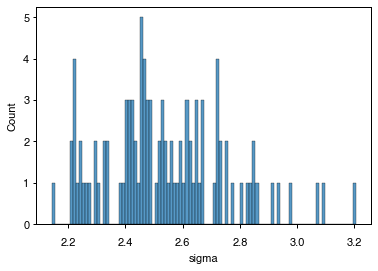

In [14]:
sns.histplot(nsd_bts_df['sigma'], bins=100)

In [ ]:
vis2D.make_param_summary_fig(tmp, 'dset_type', hue_order, pal, 
                           params_list, ylim_list, yticks_list, title_list=None,
                           width_ratios=(0.8,2,1.5,1.5,1.5), fig_size=(8.6, 1.5),
                           scale=0.9, errwidth=1.5,
                           save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'replication','summary_goal-replication_lr-0.0005_eph-30000_vs-pRFsize.svg'))